# Problema de Negócio

**All in One** é uma empresa fictícia de comércio eletrônico com sede no Reino Unido. Ela oferece uma ampla gama de produtos voltados para diversas categorias, incluindo decoração de casa, suprimentos para festas, acessórios de cozinha, soluções de armazenamento e muito mais.

Após vender com sucesso uma ampla variedade de produtos e acumular uma base substancial de clientes, a All in One reconhece o imenso valor oculto em seus dados de clientes. A empresa tem como objetivo aproveitar o poder da ciência de dados para obter **insights mais profundos** sobre sua base de clientes e aplicar esses insights de forma estratégica. Um de seus principais objetivos é **segmentar seus clientes** de forma eficaz. Essa segmentação permitirá à All in One compreender sua base de clientes em um nível mais detalhado, identificar grupos de clientes específicos com necessidades e preferências distintas, e adaptar seus esforços de marketing e ofertas de produtos de acordo.

Além disso, ao implementar um **programa de fidelidade**, a All in One busca cultivar relacionamentos mais fortes com os clientes e aumentar a retenção deles. Por meio da análise cuidadosa dos comportamentos dos clientes, padrões de compra e preferências, eles podem projetar um programa de fidelidade que ofereça incentivos personalizados, recompensas e benefícios exclusivos para diferentes segmentos de clientes. Essa abordagem personalizada não apenas promove a fidelidade do cliente, mas também cria um senso de apreço e pertencimento entre os clientes, fortalecendo ainda mais sua conexão com a marca.

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"** 

# Dados

Conjunto de dados com as vendas de produtos durante 1 ano (Nov 2015 to Dec 2017)

- **InvoiceNo**: Número da fatura, um identificador único para cada transação
- **StockCode**: Código do produto, um identificador único para cada produto
- **Description**: Descrição do produto
- **Quantity**: Quantidade de produtos comprados em cada transação
- **InvoiceDate**: Data e hora de cada transação
- **UnitPrice**: Preço unitário de cada produto
- **CustomerID**: ID do cliente, um identificador único para cada cliente
- **Country**: País do cliente

# Planejamento da Solução

## Entrada

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para participar de um Programa de Fidelidade.
2. Conjunto de Dados:
    - Dados de vendas de uma plataforma de comércio eletrônico online, cobrindo um período de um ano.



## Saída

1. Identificação das pessoas a serem parte do programa Insiders
    - Lista:

    - client_id is_insiders
    - 10323 sim/1
    - 32413 não/0
2. Relatório com respostas para perguntas de negócios:
    - Quem são as pessoas elegíveis para participar do programa Insiders?
    - Quantos clientes serão incluídos no grupo?
    - Quais são as características-chave desses clientes?
    - Qual é a porcentagem de contribuição de receita dos Insiders?
    - Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Quais as condições para uma pessoas ser elegível ao Insiders?
    - Quais as condições para uma pessoas ser removida do Insiders?
    - Qual a garantia que o programa de Insiders é melhor que o restante da base?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tarefa

1. Quem são as pessoas elegíveis para participar do programa Insiders?
    - O que significa ser elegível? Quem são os clientes de alto valor?
    - Receita:
        - Ticket médio alto.
        - Alto valor vitalício do cliente (LTV).
        - Baixa recência.
        - Tamanho do cesto alto.
        - Baixa probabilidade de churn - modelos.
        - Alta previsão de LTV - modelos.
        - Alta propensão de compra - modelos.
    - Custo:
        - Baixa taxa de devolução.
    - Experiência:
        - Media alta de avaliações.

2. Quantos clientes serão incluídos no grupo? 
    - Número total de clientes 
    - % do grupo Insiders

3. Quais são as características-chave desses clientes? 
    - Escrever características dos clientes: 
        - Idade 
        - País 
        - Salário
     - Escrever características de consumo: 
         - Vide acima.

4. Qual é a porcentagem de contribuição de receita dos Insiders? 
    - Receita total do ano 
    - Receita total do grupo Insiders(%) durante o ano.
 
5. Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Cálculo de LTV do grupo Insiders.
    - Séries Temporais(ARMA, ARIMA, HoltWinter, etc)

6. Quais as condições para uma pessoa ser elegível ao Insiders?
    - Qual o período de avaliação?
    - O 'desempenho' do cliente está próximo da média do cluster Insiders.

7. Quais as condições para um pessoas ser removida do Insiders?
    - O 'desempenho' do cliente não está mais próximo da média do cluster Insiders.
    
8. Qual a Garantia que o programa Insiders é melhor que o restante da base?
    - Teste de Hipóteses
    - Teste A/B

9. Quais as ações do time de Marketing pode realizar para aumentar o faturamento?
    - Descontos
    - Preferênciias de escolha
    - Produtos Exclusivos
    
    
    
    

# 0.0 IMPORTS

In [4]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
import inflection
import sweetviz as sv
import warnings
import re
import ydata_profiling as yd
import umap.umap_ as umap
import matplotlib.cm as cm

from matplotlib    import pyplot     as plt
from plotly        import express    as px
from scipy.cluster import hierarchy  as hc


from sklearn             import cluster       as c
from sklearn             import metrics       as mt
from sklearn             import preprocessing as pp
from sklearn             import decomposition as dd
from sklearn.manifold    import TSNE
from sklearn             import ensemble      as en
from sklearn.mixture     import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings('ignore')

## 0.1 Helper Functions

In [5]:
palette = ["#00BFFF", "#DC143C", "#FFA07A", "#FFD700", "#8B008B", "#7CFC00", "#FF69B4", "#00CED1", "#FF6347", "#9400D3"]
def jupyter_settings(palette):
    %matplotlib inline
    plt.style.use( 'seaborn-v0_8' )
    plt.rcParams['figure.figsize'] = [12, 6]
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 50
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set(font_scale=2)
    sns.set_theme()
    warnings.simplefilter("ignore")
    # plt.rcParams.update({'font.size': 10})
    sns.set_style("darkgrid")

    
jupyter_settings(palette)   

## 0.2 Loading Data

In [6]:
path = 'C:/Users/edils/repos/customer_fidelity/data/'

In [7]:
df_raw = pd.read_csv(path + 'ecommerce.csv', encoding='windows-1252')

In [8]:
df_raw = df_raw.drop('Unnamed: 8', axis=1)

In [9]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0 DATA DESCRIPTION

In [10]:
df1 = df_raw.copy()

In [11]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [12]:
# report = sv.analyze(df1)
# report.show_html()

## 1.1 Rename Columns

In [13]:
df1.columns = df1.columns.map(lambda x: inflection.underscore(x))

## 1.2 Data Dimensions

In [14]:
df1.shape

(541909, 8)

## 1.3 Data Types

In [15]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [16]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [17]:
df_missing = df1.loc[pd.isnull(df1['customer_id']),:]

In [18]:
#create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup),1)

#merge
df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce - combina o que tem NaN em uma coluna com o que não tem em outra
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

#drop extra columns
df1 = df1.drop(['customer_id_x','customer_id_y'], axis=1)

## 1.6 Change Types

In [19]:
#df1['customer_id'] = df1['customer_id'].astype('int64')

In [20]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

## 1.7 Descriptive Statistics

In [21]:
numerical_attributes = df1.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])
categorical_atributtes = df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])

## 1.7.1 Numerical Analysis

In [22]:
disp = numerical_attributes.agg(['mean','median','std','min','max',lambda x: max(x) - min(x), 'skew', 'kurtosis']).T.rename(columns={'<lambda>':'range'})

In [23]:
disp

,mean,median,std,min,max,range,skew,kurtosis
quantity,9.55225,3.0,218.081158,-80995.0,80995.0,161990.0,-0.264076,119769.160031
invoice_date,2017-07-02 00:00:13.073782016,2017-07-17 00:00:00,115 days 21:02:59.177457004,2016-11-29 00:00:00,2017-12-07 00:00:00,373 days 00:00:00,NaN,NaN
unit_price,4.611114,2.08,96.759853,-11062.06,38970.0,50032.06,186.506972,59005.719097
customer_id,16688.840453,16249.0,2911.411352,12346.0,22709.0,10363.0,0.487449,-0.804287


Podemos ver que existes dados grandes e negativos em 'quantity'e também produtos igual a 0.0 em unit_price

## 1.7.2 Categorical Atributtes

In [24]:
categorical_atributtes

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom
...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,France


In [25]:
#invoice_no
letter_lines = categorical_atributtes['invoice_no'].apply(lambda x: bool (re.search('[a-zA-Z]', x)))
letter_df = df1.loc[letter_lines,'quantity']
any(letter_df >0)

True

Todos os valores de invoice que começam com C tem valores de quantidade negativos, provavelmente são itens de devolução

In [26]:
#stock_code
stock_letter = categorical_atributtes['stock_code'].apply(lambda x: bool (re.search('^[a-zA-Z]+$', x)))
stock_df = df1.loc[stock_letter,:]

In [27]:
stock_df['stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

Na coluna stock_code temos vários itens com descrições diferentes que estão sujando o dataframe

In [28]:
#country - European Community and Unspecified
df1['country'].unique()
df1.loc[:,['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values(by='customer_id', ascending=False)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


In [29]:
#remove description

# 2.0 VARIABLE FILTERING

In [30]:
df2 = df1.copy()

## 2.1 Numerical Attributes

In [31]:
#unit_price
df2 = df2.loc[df2['unit_price'] >= 0.040,:]

#stock code
df2 = df2.loc[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK']),:]

#description
df2 = df2.drop('description', axis=1)

#country
df2 = df2.loc[~df2['country'].isin(['Unspecified','European Community']),:]

#bad users

df2 = df2.loc[~df2['customer_id'].isin([16446]),:]


Deixei apenas preços acima de 0. Letras do Stock code que poluem os dados. Description não ajuda na clusterização e Países da União europeia já são repetidos e Países Não especificados poluem os dados

In [32]:
#divide df in purchases and returns
df_purchase = df2.loc[df2['quantity'] >=0, :]
df_returns = df2.loc[df2['quantity'] < 0,:]

# 3.0 FEATURE ENGINEERING

In [33]:
df3 = df2.copy()

In [34]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850.0


## 3.1 Monetary 

In [35]:
#Monetary - O quanto cada cliente gera de $
aux_monetary = pd.DataFrame()
aux_monetary['valor_bruto'] = df_purchase['quantity'] * df_purchase['unit_price']
aux_monetary['customer_id'] = df_purchase['customer_id']
df_ref = aux_monetary.loc[:,['valor_bruto', 'customer_id']].groupby('customer_id').sum().reset_index().rename(columns={'valor_bruto':'monetary'})
df_ref.isna().sum()

customer_id    0
monetary       0
dtype: int64

## 3.2 Frenquency Purchase

In [36]:
df_freq = (df_purchase[['customer_id','invoice_no', 'invoice_date']].drop_duplicates().groupby('customer_id')
                                                           .agg(days = ('invoice_date', lambda x: (max(x) - min(x)).days + 1),
                                                                buy_ = ('invoice_no', 'count'))).reset_index()

#Frequency
df_freq['frequency'] = df_freq.apply(lambda x: x['buy_'] / x['days'] if x['days'] != 0 else 0, axis=1) 

#merge
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref = df_ref.drop(['days','buy_'],axis=1)
df_ref.isna().sum()

## 3.2 Qtd de Compras

In [33]:
#Quantos produtos cada cliente comprou
aux_invoice = df_purchase.loc[:,['invoice_no','customer_id']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'qtd_compras'})
df_ref = pd.merge(df_ref, aux_invoice, on='customer_id', how='left')
df_ref.isna().sum()

customer_id    0
monetary       0
qtd_compras    0
dtype: int64

## 3.3 Recency

In [37]:
#Recency
aux_recency = df_purchase.loc[:,['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
date_max = df_purchase['invoice_date'].max()
aux_recency['recency'] = (date_max - aux_recency['invoice_date']).dt.days
df_ref = pd.merge(df_ref, aux_recency, on='customer_id', how='left')
df_ref = df_ref.drop(['invoice_date'],axis=1)
df_ref.isna().sum()

customer_id    0
monetary       0
frequency      0
recency        0
dtype: int64

## 3.4 Average Unit Price

In [38]:
aux_unit_price = df_purchase.loc[:,['customer_id','unit_price']].groupby('customer_id').mean().reset_index().rename(columns={'unit_price':'avg_unit_price'})
df_ref = pd.merge(df_ref, aux_unit_price, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
monetary          0
frequency         0
recency           0
avg_unit_price    0
dtype: int64

In [39]:
df_ref.head()

,customer_id,monetary,frequency,recency,avg_unit_price
0,12346.0,77183.60,1.000000,325,1.040000
1,12347.0,4310.00,0.019126,2,2.644011
2,12348.0,1437.24,0.014085,75,0.692963
3,12349.0,1457.55,1.000000,18,4.237500
4,12350.0,294.40,1.000000,310,1.581250


## 3.4 Média de produtos comprados

In [40]:
#Quantos produtos cada cliente comprou
aux_qtd = df_purchase.loc[:,['quantity','customer_id']].groupby('customer_id').mean().reset_index().rename(columns={'quantity':'avg_qtd_items'})
df_ref = pd.merge(df_ref, aux_qtd, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
monetary          0
frequency         0
recency           0
avg_unit_price    0
avg_qtd_items     0
dtype: int64

## 3.5 Product Variety

In [41]:
#Quantos produtos cada cliente comprou
aux_qtd_stock = df_purchase.loc[:,['stock_code','customer_id']].groupby('customer_id').nunique().reset_index().rename(columns={'stock_code':'prod_variety'})
df_ref = pd.merge(df_ref, aux_qtd_stock, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
monetary          0
frequency         0
recency           0
avg_unit_price    0
avg_qtd_items     0
prod_variety      0
dtype: int64

## 3.7 Average Ticket

In [37]:
#Ticket Médio
aux_ticket = aux_monetary.loc[:,['valor_bruto', 'customer_id']].groupby('customer_id').mean().reset_index().rename(columns={'valor_bruto':'avg_ticket'})
df_ref = pd.merge(df_ref, aux_ticket, on='customer_id', how='left') 
df_ref.isna().sum()

customer_id    0
monetary       0
qtd_compras    0
qtd_items      0
qtd_prods      0
recency        0
avg_ticket     0
dtype: int64

## 3.8 Average Recency Days

In [38]:
aux_rd = df3.loc[:,['invoice_date','customer_id']].drop_duplicates().sort_values(by=['customer_id','invoice_date'])
aux_rd['previous_customer'] = aux_rd['customer_id'].shift() #next customer
aux_rd['previous_invoice'] = aux_rd['invoice_date'].shift() #next date
aux_rd['avg_recency_days'] = aux_rd.apply(lambda x: (x['invoice_date'] - x['previous_invoice']).days if x['previous_customer'] == x['customer_id'] else np.nan, axis=1)
aux_rd = aux_rd.dropna()

#drop support columns
aux_rd = aux_rd.drop(['invoice_date','previous_customer','previous_invoice'], axis=1)

#calculate avg recency
aux_rd_avg = aux_rd.groupby('customer_id').mean().reset_index()

#merge
df_ref = pd.merge(df_ref, aux_rd_avg, on='customer_id', how='left')


In [39]:
df_ref.isna().sum()

customer_id            0
monetary               0
qtd_compras            0
qtd_items              0
qtd_prods              0
recency                0
avg_ticket             0
avg_recency_days    2727
dtype: int64

In [41]:
df_ref.isna().sum()

customer_id            0
monetary               0
qtd_compras            0
qtd_items              0
qtd_prods              0
recency                0
avg_ticket             0
avg_recency_days    2727
frequency              0
dtype: int64

## 3.10 Devoluções

In [42]:
qtd_returns = df_returns.loc[:,['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtd_returns'})
qtd_returns['qtd_returns'] = qtd_returns['qtd_returns']*-1

#merge
df_ref = pd.merge(df_ref, qtd_returns, on='customer_id', how='left')

#Os NaNs gerados são pessoas que não devolveram
df_ref.loc[df_ref['qtd_returns'].isna(),'qtd_returns'] = 0

In [43]:
df_ref.isna().sum()

customer_id            0
monetary               0
qtd_compras            0
qtd_items              0
qtd_prods              0
recency                0
avg_ticket             0
avg_recency_days    2727
frequency              0
qtd_returns            0
dtype: int64

## 3.11 Unique Basket Size

In [44]:
#qtd de produtos diferentes dentro de uma compora
basket_size = df_purchase.loc[:,['customer_id','stock_code','invoice_no']].groupby(['customer_id']).nunique().reset_index()

#media itens por compra
basket_size['unique_avg_basket'] = basket_size['stock_code'] / basket_size['invoice_no']

#merge
df_ref = pd.merge(df_ref, basket_size[['customer_id','unique_avg_basket']], on='customer_id', how='left')

In [45]:
df_ref.isna().sum()

customer_id             0
monetary                0
qtd_compras             0
qtd_items               0
qtd_prods               0
recency                 0
avg_ticket              0
avg_recency_days     2727
frequency               0
qtd_returns             0
unique_avg_basket       0
dtype: int64

## 3.12 Quantity Basket Size - Quantidade de produtos por basket

In [46]:
#qtd de produtos medios por compra
qtd_basket_size = (df_purchase.loc[:,['customer_id','quantity','invoice_no']].groupby(['customer_id'])
                                                                            .agg(uniq_prod = ('invoice_no', 'nunique'),
                                                                                 quantity_sum = ('quantity', 'sum'))).reset_index()    

#media de quantidade de itens por basket
qtd_basket_size['avg_basket'] = qtd_basket_size['quantity_sum'] / qtd_basket_size['uniq_prod']

#merge
df_ref = pd.merge(df_ref, qtd_basket_size[['customer_id','avg_basket']], on='customer_id',how='left')

In [47]:
df_ref.isna().sum()

customer_id             0
monetary                0
qtd_compras             0
qtd_items               0
qtd_prods               0
recency                 0
avg_ticket              0
avg_recency_days     2727
frequency               0
qtd_returns             0
unique_avg_basket       0
avg_basket              0
dtype: int64

## 3.13 Check Final Result

In [48]:
df_ref.head()

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket
0,12346.0,77183.60,1,74215,1,325,77183.600000,NaN,1.000000,74215.0,1.000000,74215.000000
1,12347.0,4310.00,7,2458,182,2,23.681319,60.833333,0.019126,0.0,14.714286,351.142857
2,12348.0,1437.24,4,2332,27,75,53.231111,94.333333,0.014085,0.0,5.250000,583.000000
3,12349.0,1457.55,1,630,72,18,20.243750,NaN,1.000000,0.0,72.000000,630.000000
4,12350.0,294.40,1,196,16,310,18.400000,NaN,1.000000,0.0,16.000000,196.000000


# 4.0 EDA (EXPLORATORY DATA ANALYSIS

In [49]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id          0
monetary             0
qtd_compras          0
qtd_items            0
qtd_prods            0
recency              0
avg_ticket           0
avg_recency_days     0
frequency            0
qtd_returns          0
unique_avg_basket    0
avg_basket           0
dtype: int64

## 4.1 Unilateral Analysis

**Notes**

1. Clusters Coesos - Separados
2. Métricas
    - Min, Máx, Range (Dispersão).
    - Média, Mediana.
    - Desvio Padrão e Variância.
    - Coeficiente de Variação (desvio padrão/media). -> quanto menor mais próximos estão os dados(mais perto da média).
    - Distribuição

**Notes**



In [50]:
# #Pandas Profiling

# profile = yd.ProfileReport(df4)
# profile.to_file('outputv2.html')

### 4.1.1 Monetary

In [51]:
#analisando outliers
df4[df4['customer_id'] == 14646]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket
1686,14646.0,279138.02,72,196844,2060,1,135.503893,7.844444,0.20339,288.0,9.708333,2733.944444


### 4.1.2 Qtd Produtos

In [52]:
df4[df4['qtd_prods'] == 7838]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket
4002,17841.0,40967.72,124,23053,7838,1,5.226808,3.321429,0.33244,203.0,10.66129,185.91129


### 4.1.3 Avg Ticket

In [53]:
df4[df4['avg_ticket'] == 56157.5]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket


In [54]:
# df3[df3['customer_id'] == 16446]

Nesse caso o cliente devolveu quase todos os itens que comprou -> Remover

### 4.1.4 Frequency

In [55]:
df4[df4['frequency'] == 17]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket
4007,17850.0,5391.21,34,1733,297,372,18.152222,35.5,17.0,40.0,0.617647,50.970588


In [56]:
df3.loc[df3['customer_id'] == 17850,:].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850.0


### 4.1.5 Avg Basket Size

In [57]:
df4[df4['avg_basket'] == 40498.5]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket


## 4.2 Bivariate Analysis

In [58]:
df_bi = df4.drop('customer_id', axis=1)

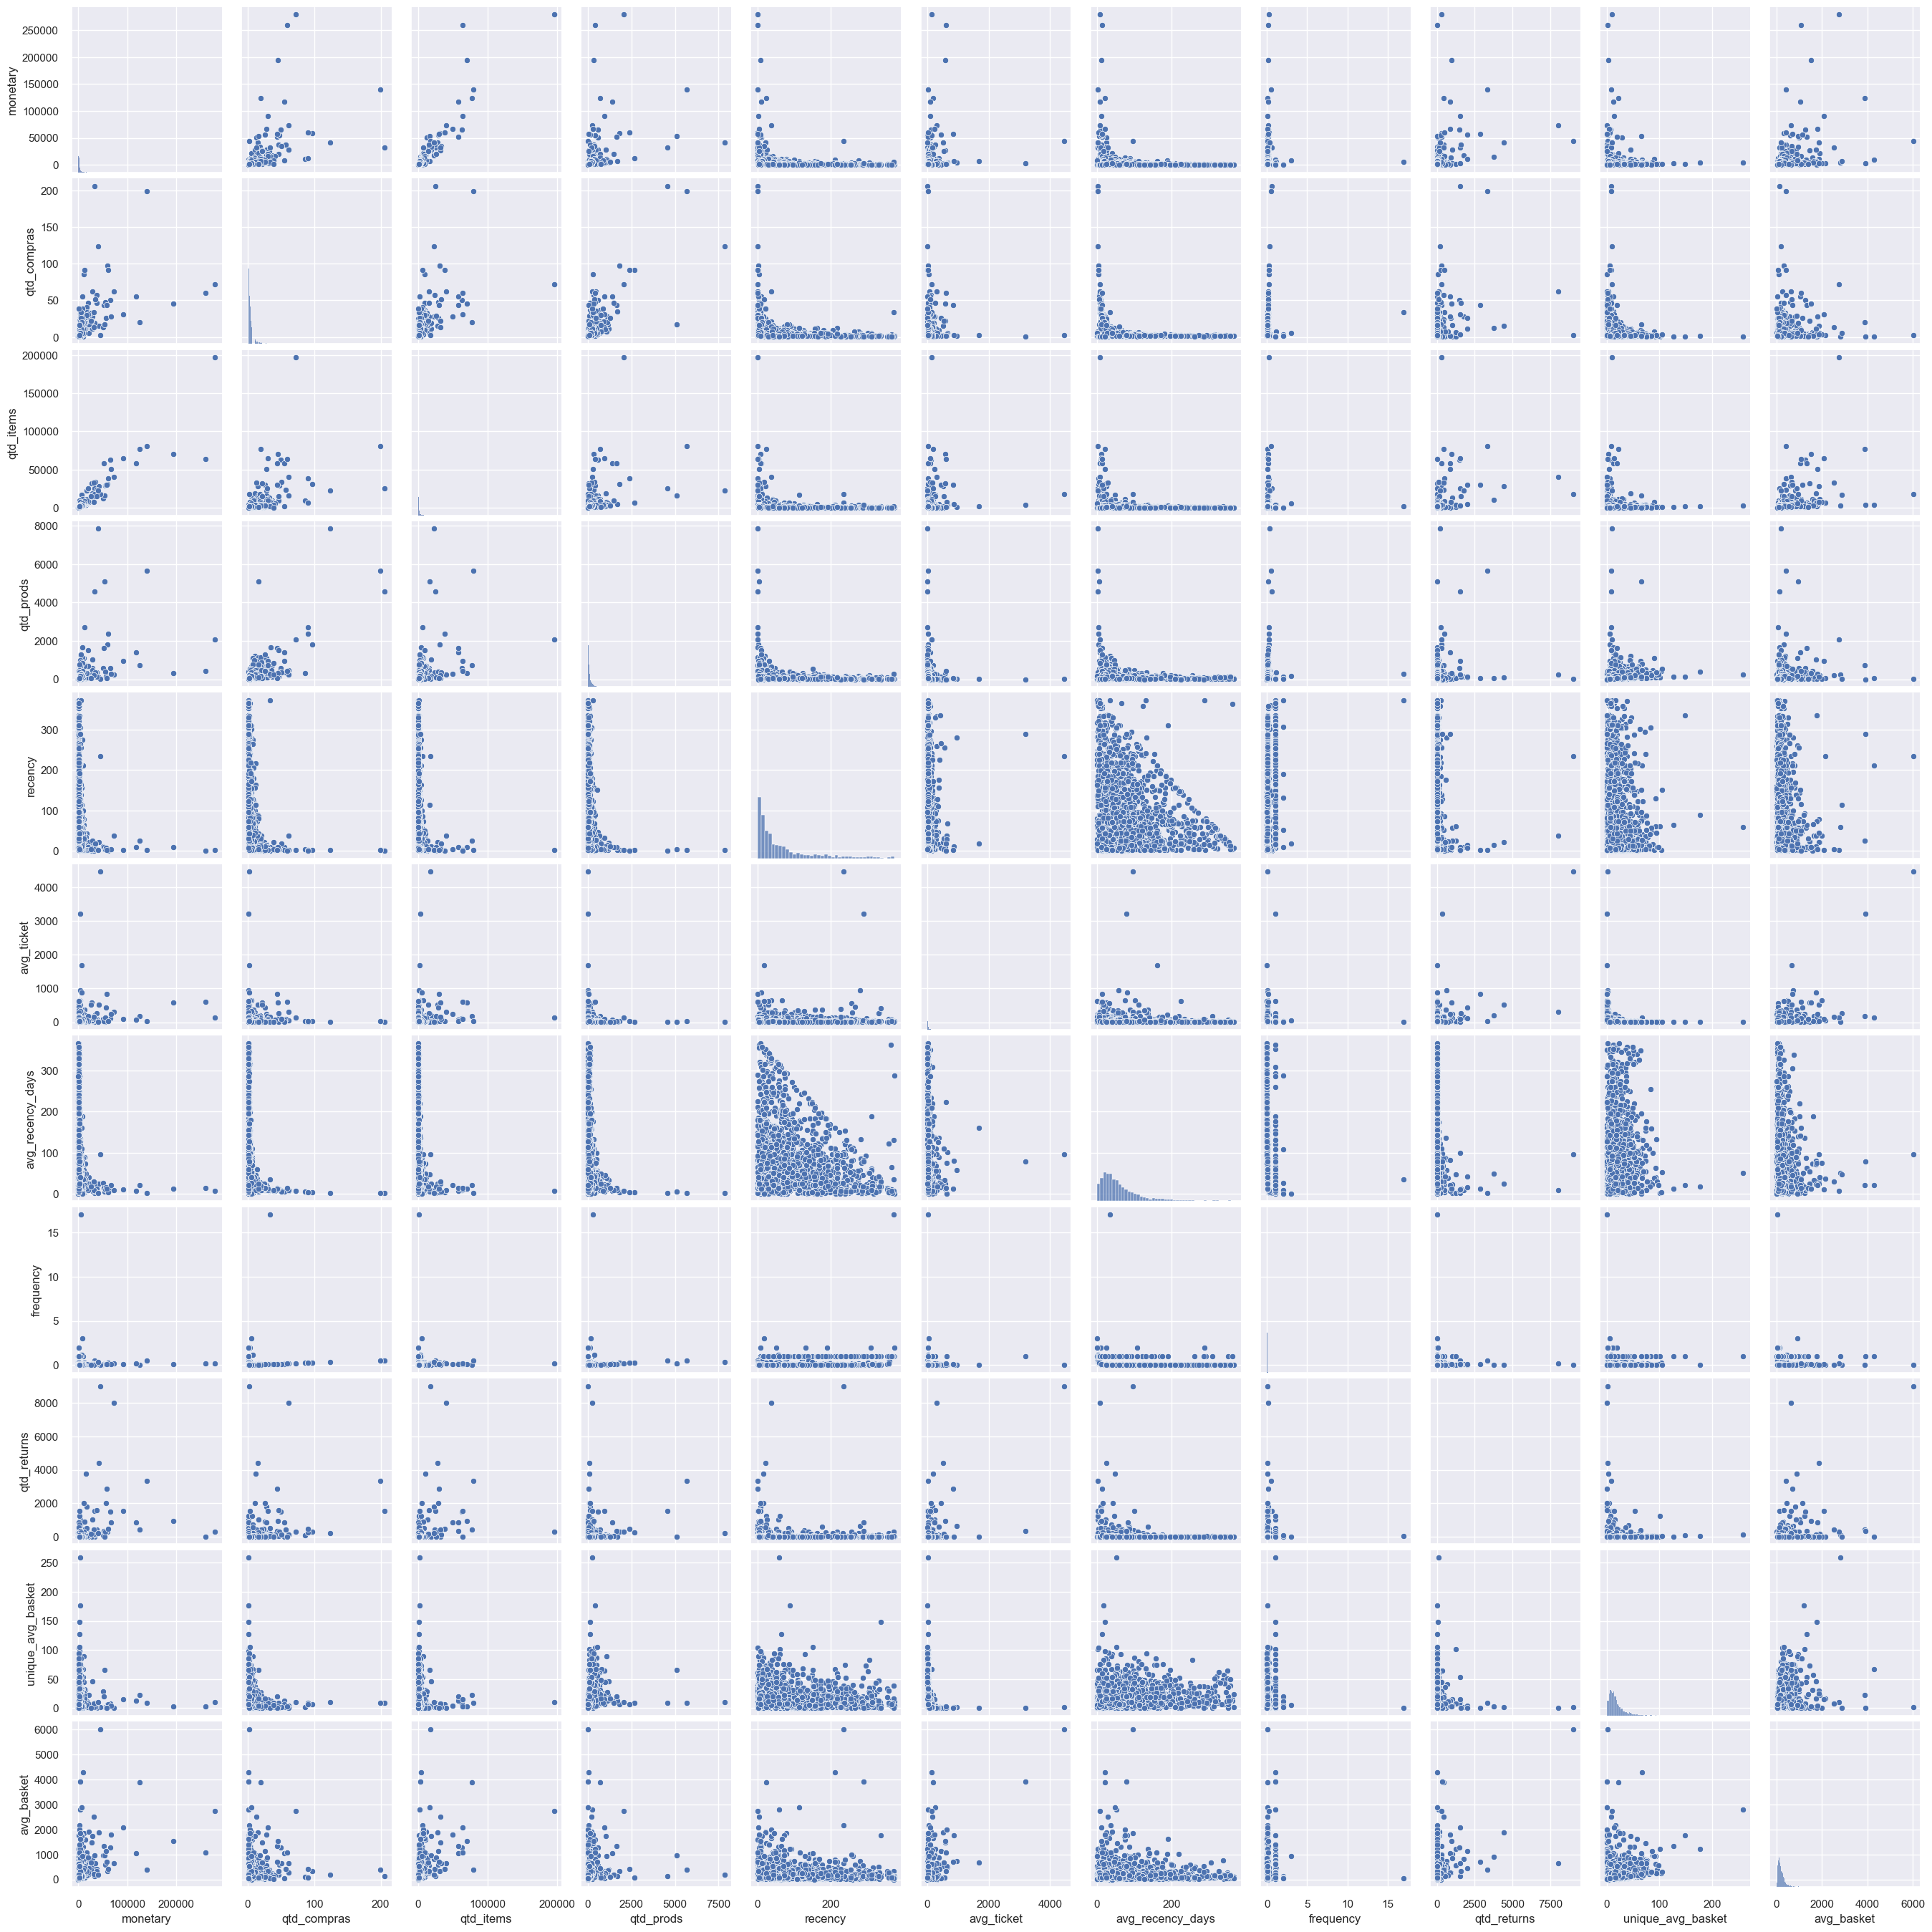

In [59]:
sns.pairplot(df_bi)

Estamos buscando variáveis com bastante variação. No caso da Frequency por exemplo, provavelmente não é uma variável que impactará o modelo pois em relação às outras ela praticamente não muda.

Candidatas a remoção -> frequency, avg_ticket


## 4.3 Embedding

In [60]:
#original dataset
#df43 = df4.drop(['customer_id'], axis=1).copy()

#selected dataset
cols_selected = ['customer_id', 'monetary', 'recency', 'qtd_prods', 'frequency', 'qtd_returns']
df43 = df4[cols_selected].copy()

In [61]:
#Transform
mms = pp.MinMaxScaler()
transf_list = df43.columns.drop('customer_id')

for i in transf_list:
    df43[i] = mms.fit_transform(df43[i].values.reshape(-1,1))
    
X = df43.copy()    

In [62]:
transf_list

Index(['monetary', 'recency', 'qtd_prods', 'frequency', 'qtd_returns'], dtype='object')

## 4.3.1 PCA

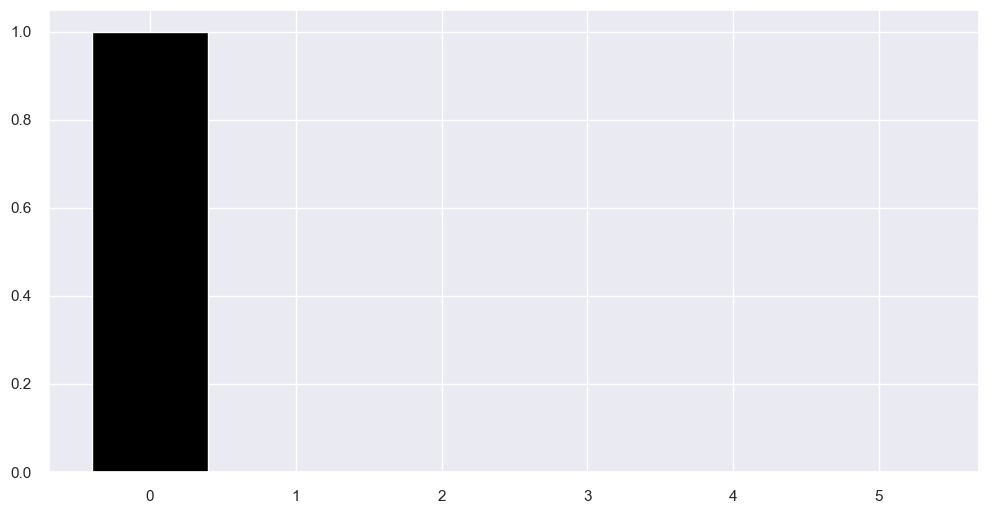

In [63]:
pca = dd.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

#plot explained variable
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')

#pca component
df_pca = pd.DataFrame(principal_components)

Como estamos procurando varáveis com muita variação, optei por reduzir o espaço para as 2 variáveis que tem a maior variância segundo o PCA para ver se forma alguns clusters

<Axes: xlabel='0', ylabel='1'>

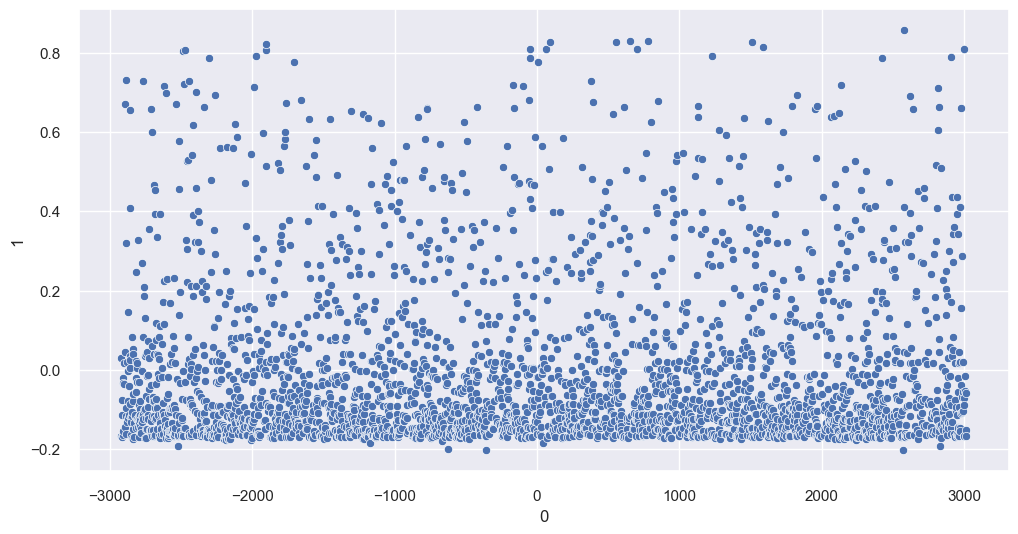

In [64]:
sns.scatterplot(x=0, y=1, data=df_pca)

PCA não deu muito certo, mostrando um espaço ainda bagunçado

## 4.3.2 U-MAP

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

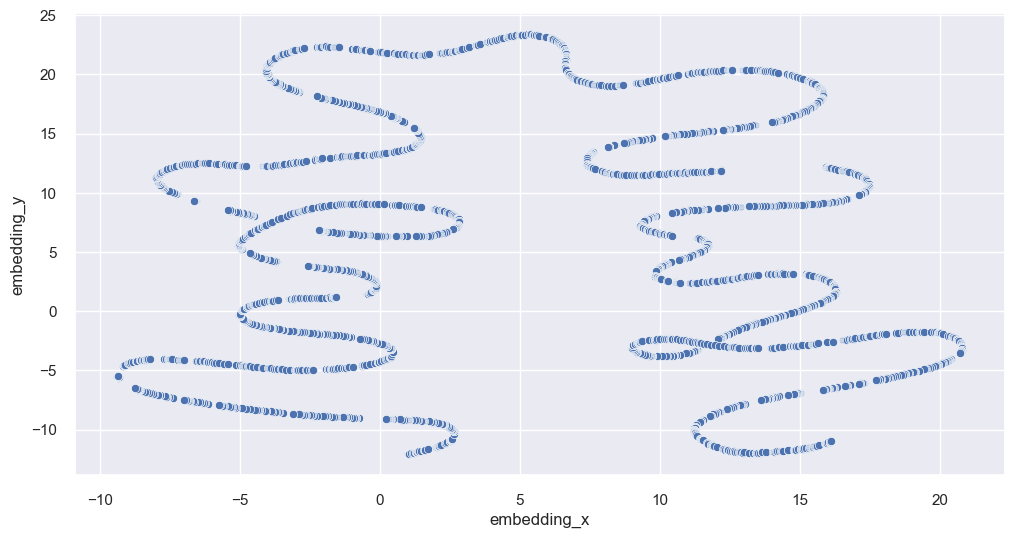

In [65]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_pca)

UMAP deu um espaço pouca coisa melhor que o PCA mas ainda sim bem aleatório

## 4.3.3 t-SNE

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

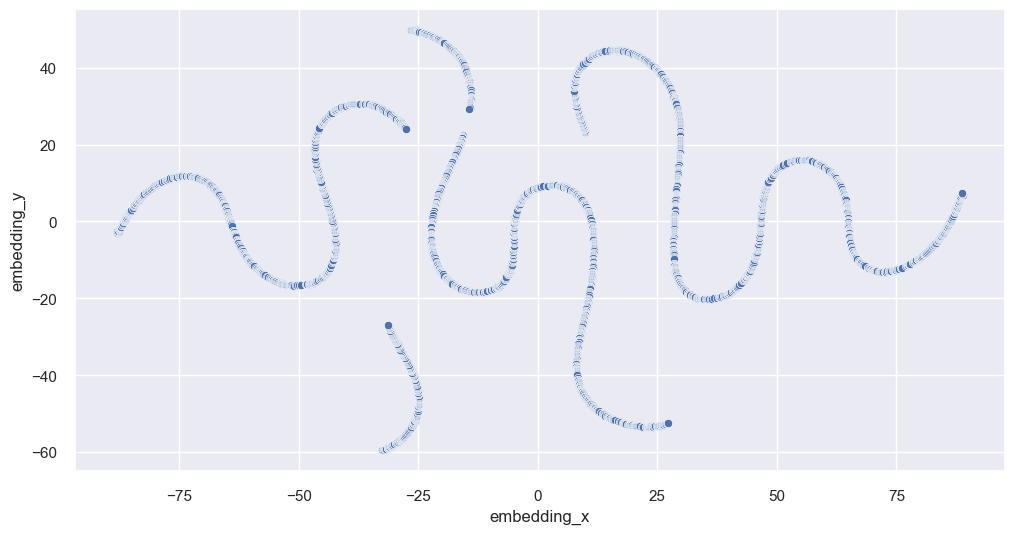

In [66]:
reducer = TSNE(n_components=2, random_state=42, n_jobs=-1)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_pca)

Assim como o UMAP, não conseguiu organizar os dados

## 4.3.4 Tree-Based Embedding

In [67]:
X = df43.drop(['customer_id','monetary'], axis=1).copy()
y = df43['monetary'].copy()

In [68]:
#model definition
rf = en.RandomForestRegressor(random_state=0)

rf.fit(X, y)

RandomForestRegressor(random_state=0)

In [69]:
#create leafs
df_leafs = pd.DataFrame(rf.apply(X))

In [70]:
df_leafs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2584,2621,2796,2605,2694,2703,2550,2769,2614,2718,2715,2683,2561,2551,2538,2070,2554,3008,3104,2622,2606,2664,2585,2843,2703,2948,2627,2667,3018,2583,2689,2559,3005,2588,2997,2615,3009,2528,3075,2353,2886,2979,2645,2741,2719,2648,2556,2998,2584,2702,2671,2929,2726,2652,2862,2545,2588,2529,3055,2997,2993,2738,2707,3045,2572,2615,2618,2701,2607,3024,3139,2530,2716,2536,2600,2640,3048,2503,2742,3027,2578,2555,2584,2577,3052,2380,2134,2365,2592,3128,2988,3001,2755,2685,3097,2576,3039,2637,2961,2608
1,176,1304,1008,626,915,642,771,925,778,531,1112,633,1023,236,319,558,855,289,1088,400,1103,789,819,791,929,282,1103,939,1120,199,992,855,1405,340,1294,256,248,738,323,999,1133,891,827,502,255,423,694,253,1113,310,1135,857,1402,928,1110,567,866,326,473,825,1175,456,1037,360,1202,919,1070,930,456,299,832,830,269,856,1371,870,1066,746,284,222,883,613,1065,839,1125,626,270,1074,561,869,824,588,232,227,1562,756,530,279,276,1104
2,2224,2402,2423,2410,2404,2458,2408,2223,2376,2477,2301,2483,2345,2253,2222,2381,2451,2394,2677,2461,2409,2358,2414,2025,2322,2443,2109,2324,2816,2360,2224,2340,2290,2389,2770,2468,2590,2433,2141,2240,2065,2438,2260,2347,2353,2445,2183,2540,2224,2519,2402,2679,2093,2338,2421,2079,2267,2316,2265,2362,2150,2302,2356,2168,2276,2298,2459,2539,2511,2685,2370,2437,2373,2263,2404,2376,2732,2300,2355,2124,2153,2333,2070,2088,2517,2639,2367,2107,2084,2947,2103,2582,2407,2425,2318,2403,2706,2058,2638,2306
3,1257,1099,1493,1464,1464,1557,1457,1435,1366,1254,1763,1166,1470,1147,1370,1325,1534,1293,1844,1228,1332,1391,1638,1423,1119,1124,1427,1539,1550,1597,1424,1532,937,1532,857,1707,1382,1427,1470,1455,1398,1017,1451,1145,1391,1285,1403,1090,867,1460,1597,1367,865,1405,1606,1442,1392,1451,1500,1586,1678,1399,995,1241,1507,979,910,1579,1087,1157,1030,1398,1366,960,996,1498,1117,1665,1071,1183,1426,1472,980,1052,1245,1090,1176,854,1483,1511,873,1418,1430,1013,947,1473,1691,1046,1226,1562
4,23,215,97,159,156,57,132,16,316,45,165,178,192,136,43,90,214,146,121,33,198,95,51,50,123,164,265,123,34,29,86,137,39,34,135,83,94,111,214,33,167,224,161,53,241,226,15,167,60,263,104,29,148,142,131,30,143,86,16,115,276,158,38,47,61,62,201,54,236,26,47,26,169,167,174,261,86,55,273,126,35,87,60,45,48,193,60,170,174,106,58,116,120,180,133,153,312,18,23,38


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

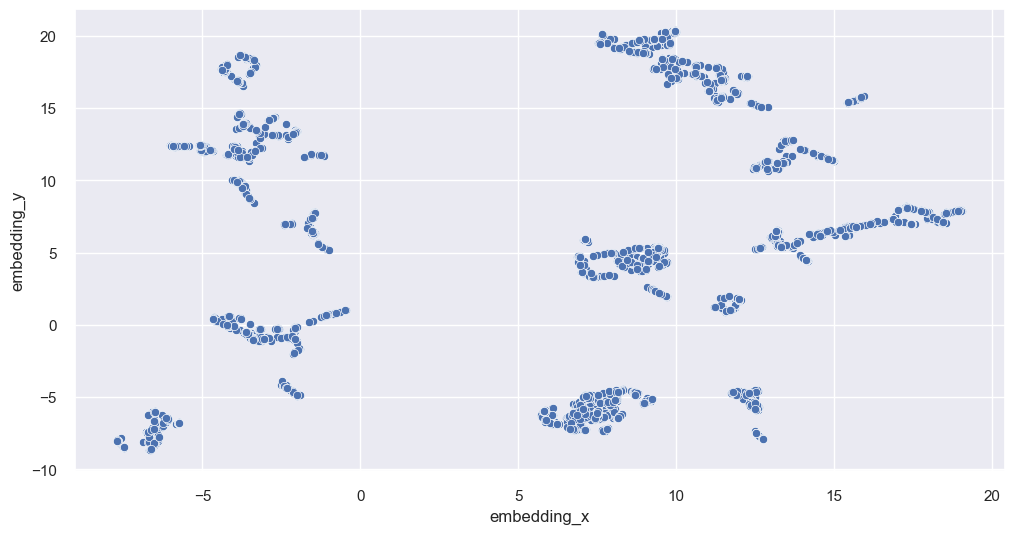

In [71]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leafs)

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:,0]
df_tree['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_tree)

A redução de dimensionalidade pela RandomForest deu um resultado muito melhor, podendo ser observados vários clusters espaçados na imagem acima.

# 5.0 DATA PREPARATION

Padronização (Standardization) -> Premissa de que os dados vieram de uma dist. normal
Rescala (Rescaling) -> Sem premissa

**Notes**

1. Distribuição Normal e não possui Outlier -> Standard Scaler
2. Distruibuição Normal e Possui Outlier -> Robust Scaler - Quartis
3. Não Distruição Normal -> MinMaxScaler

**Testes de Normalidade**
1. QQ Plot - Quantile Plot(Quatile teorica x Quantile real)
2. KS Teste - Kolgomorov Smirnoff

**Detecção de Outliers**
1. Box Plot -> Pontos são identificados como Outliers
2. IRQ * 2.5 -> acima desse valor(Outlier)

Z-Score
1. -3 > z_Score > 3 -> Outliers

Normalização -> (Dinheiro - Media(dinheiro))/desvio_padrao(dinheiro) = Dinheiro/Dinheiro -> Adimensional Faz sentido calcular distâncias

Rescala -> (Dinheiro - Min(Dinheiro) / Max (dinheiro) - Min(dinheiro)) = Dinheiro / Dinheiro = Adimensional Faz sentido usar distâncias

In [72]:
#testar emcima do embedding tree
df5 = df_tree.copy()
#df5 = df4.copy()

In [73]:
# mms = pp.MinMaxScaler()
# ss = pp.StandardScaler()

# #Transform
# transf_list = df5.drop('customer_id', axis=1).columns

# for i in transf_list:
#     df5[i] = mms.fit_transform(df5[i].values.reshape(-1,1))    

Após olhar as variáveis, nenhuma apresentou algo perto de uma distruibuição normal, então optamos por utilizar MinMax em todas

# 6.0 FEATURE SELECTION

Optei por remover algumas variáveis. Inicialmente vou tirar todas as variáveis que representam uma média, porque no fim do projeto já irei entregar as médias para o CEO

Olhando o pairplot na seção 4.2, podemos observar algumas variáveis que representam a mesma coisa, ex: qtd_items, qtd_invoices, qtd_prods

In [74]:
# cols_selected = ['customer_id','monetary', 'qtd_prods', 'recency', 'frequency', 'qtd_returns']

In [75]:
#df6 = df5.loc[:,cols_selected].copy()
df6 = df_tree.copy()

# 7.0 HYPERPARAMETER FINE TUNNING(Find Clusters)

In [76]:
#X = df6.drop('customer_id', axis=1)
X = df_tree.copy()

In [77]:
X.head()

,embedding_x,embedding_y
0,12.615181,11.044086
1,-6.499238,-8.245778
2,9.478956,5.369207
3,7.712303,-7.336355
4,-3.489240,18.404636


In [78]:
#clusters = np.arange(2,8,1)
clusters = np.arange(2,25,1)

## 7.1 K-Means

In [79]:
kmeans_list = []
for k in clusters:
    #model
    kmeans_model = c.KMeans(n_clusters=k)

    #training
    kmeans_model.fit(X)

    #predict
    labels = kmeans_model.predict(X)

    #performance
    sil = mt.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)

Text(0.5, 1.0, 'K x Silhouette Score')

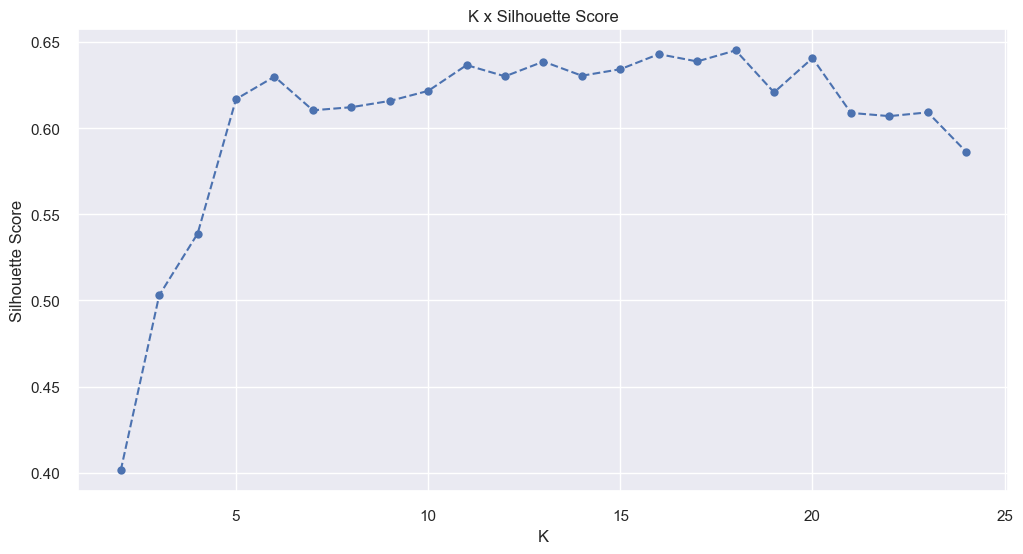

In [80]:
plt.plot(clusters, kmeans_list, marker='o', color='b', linestyle='--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('K x Silhouette Score')

Usando o embedding da árvore de decisão conseguimos valores de silhueta maiores e com mais clusters.

## 7.2 GMM

In [81]:
gmm_list = []
for k in clusters:
    #model definition
    model_gmm = GaussianMixture(n_components=k) #numero de gaussianas

    #model training
    model_gmm.fit(X)

    #model predict
    labels = model_gmm.predict(X)

    #model performance
    sil = mt.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)

Text(0.5, 1.0, 'K x Silhouette Score')

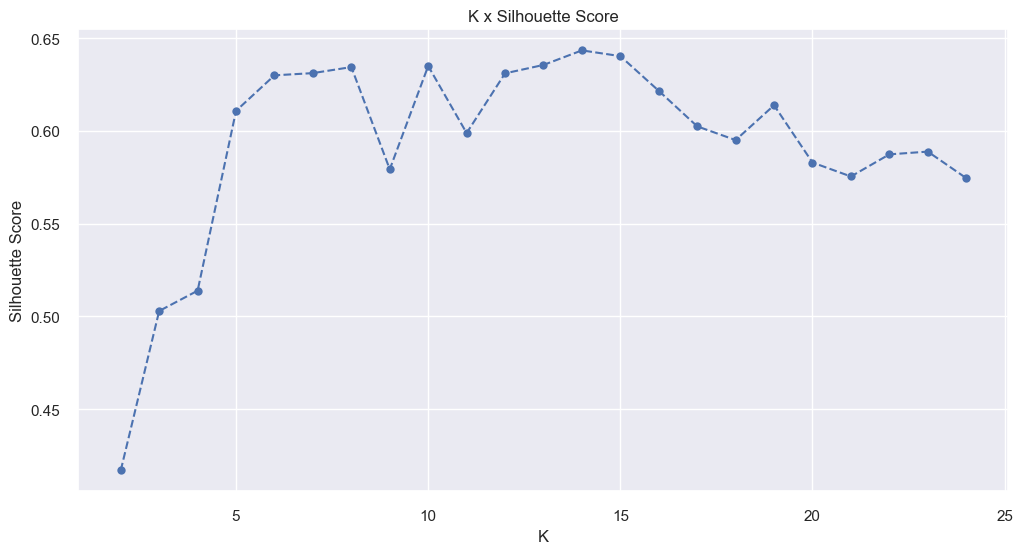

In [82]:
plt.plot(clusters, gmm_list, linestyle='--', color='b', marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('K x Silhouette Score')

## 7.3 Hierachical Clustering

In [83]:
#model definition and training
hc_model = hc.linkage(X, 'ward')

In [84]:
# hc.dendrogram(
#                 hc_model,
#                 leaf_rotation=90,
#                 leaf_font_size=9)

# plt.plot()

Cluster amarelo tende a ser mais bagunçado e esticado. O cluster rosa claro tende a ser mais redondo e uniforme

[]

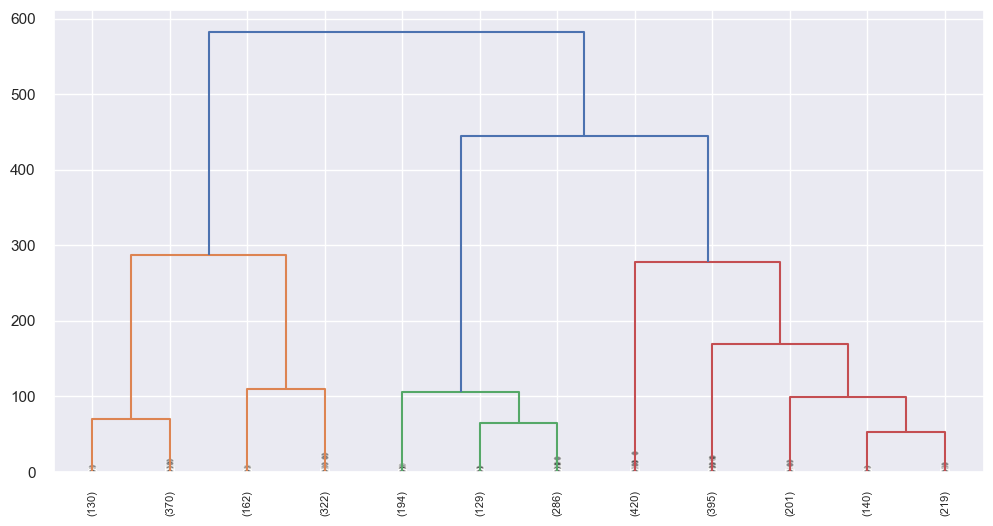

In [85]:
hc.dendrogram(
                hc_model,
                truncate_mode='lastp',
                p=12,
                leaf_rotation=90,
                leaf_font_size=8,
                show_contracted=True)

plt.plot()

### 7.3.1 HClustering Silhouette Score

In [86]:
hc_list = []
for k in clusters:
    #model definition & training
    hc_model = hc.linkage(X, 'ward')

    #model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')

    #metrics
    sil = mt.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

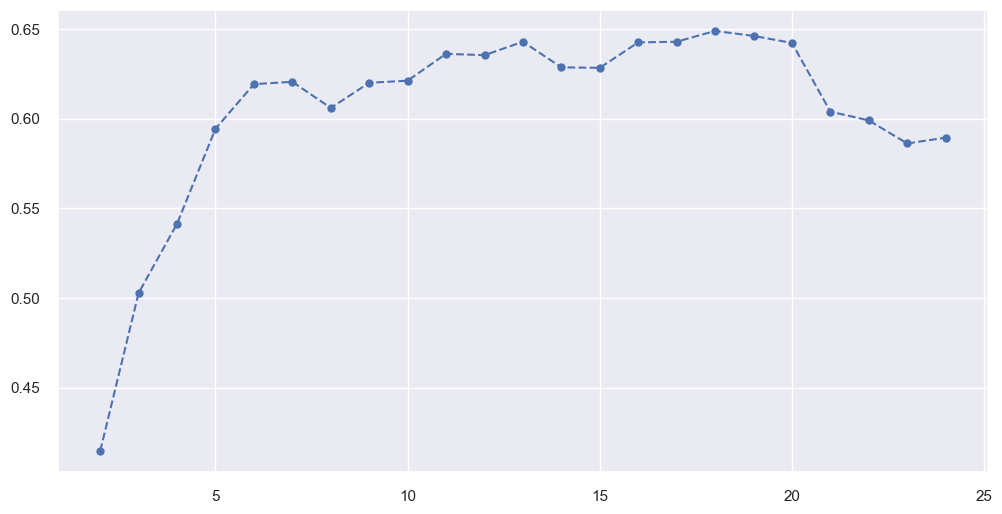

In [87]:
plt.plot(clusters, hc_list, linestyle='--', marker='o')

## 7.4 DBSCAN

In [88]:
eps = 2 #tamanho do raio da gaussiana
min_samples = 20 #qtd minima de pontos dentro do raio para considerar como vizinhança

#model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

#model training & predict
labels = dbscan_model.fit_predict(X)

#silhouette
sil = mt.silhouette_score(X, labels, metric='euclidean')

print(f'Sillhouette Score: {sil}')
print(f'Number of Clusters: {len(np.unique(labels))}')



Sillhouette Score: 0.6361267566680908
Number of Clusters: 10


In [89]:
from sklearn.neighbors import NearestNeighbors

In [90]:
neighbors = NearestNeighbors(n_neighbors=min_samples).fit(X) #pega o qtd de pontos considerado na gaussiana e 
                                                             #calcular a média das disntacias dos 20 
                                                             #mais proximos para todos os outros pontos
distances, indices = neighbors.kneighbors(X)                

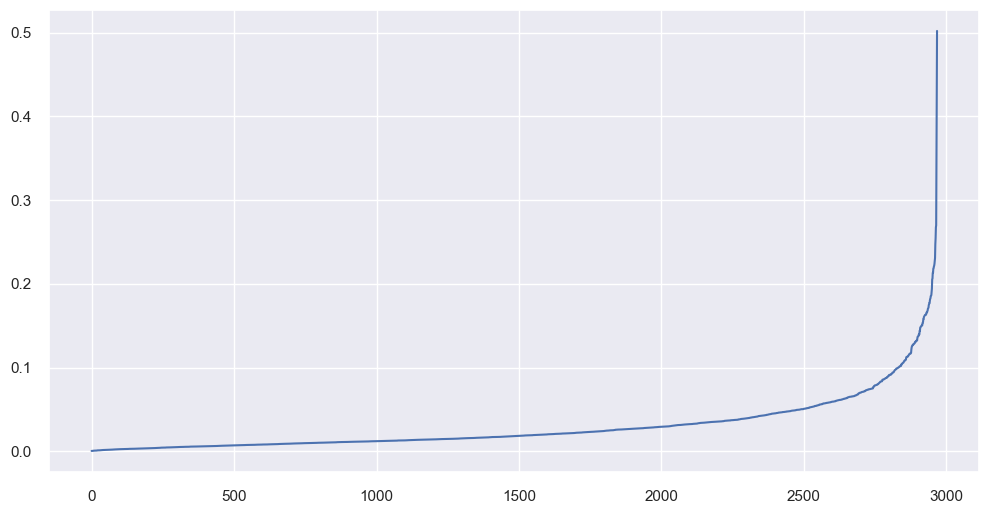

In [91]:
distances = np.sort(distances, axis=0)
distances = distances[:,1] #a primeira coluna já possui a distancia de todos os pontos
plt.plot(distances)

Onde o cotovelo forma, é onde as distâncias dos pontos em relação aos vizinhos mais próximos começa a ficar muito grande. Quando o cotovelo começa a formar geralmente é o número que devo usar no raio da Gaussina no DBSCAN, no caso algo perto de 0.2

In [92]:
dbscan_list = [0.622034, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,]

## 7.5 Results

In [93]:
df_results = pd.DataFrame({
            'KMeans': kmeans_list,
            'GMM': gmm_list,
            'HCluster': hc_list
            #'DBSCAN': dbscan_list}
}).T
df_results.columns = clusters

In [94]:
df_results.style.highlight_max(color='lightgreen', axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
KMeans,0.401377,0.502924,0.538769,0.616810,0.629871,0.610330,0.612129,0.615767,0.621592,0.636566,0.630037,0.638614,0.630398,0.634171,0.642924,0.638677,0.645095,0.620729,0.640613,0.608823,0.606946,0.609133,0.586238
GMM,0.416981,0.502924,0.513850,0.610831,0.629964,0.631162,0.634419,0.579300,0.634993,0.598846,0.631037,0.635565,0.643413,0.640315,0.621600,0.602461,0.595060,0.613826,0.582956,0.575431,0.587358,0.588846,0.574557
HCluster,0.414898,0.502924,0.541488,0.594419,0.619260,0.620549,0.606024,0.620020,0.621183,0.636157,0.635404,0.642883,0.628627,0.628340,0.642519,0.642890,0.648899,0.646143,0.642216,0.603956,0.599055,0.586207,0.589450


Podemos ver que com o embedding da árvore ele consegue subdividir muito melhor os dados. Porém usar 17 grupos é uma quantidade alta. Utilizarei 11 por enquanto pois já tem uma silhueta alta.

## Silhouette Analysis

For K = 2, Silhouette Score: 0.41489848494529724
For K = 3, Silhouette Score: 0.5029236674308777
For K = 4, Silhouette Score: 0.5414875149726868
For K = 5, Silhouette Score: 0.594419002532959
For K = 6, Silhouette Score: 0.6192598938941956
For K = 7, Silhouette Score: 0.6205489039421082


IndexError: index 3 is out of bounds for axis 0 with size 3

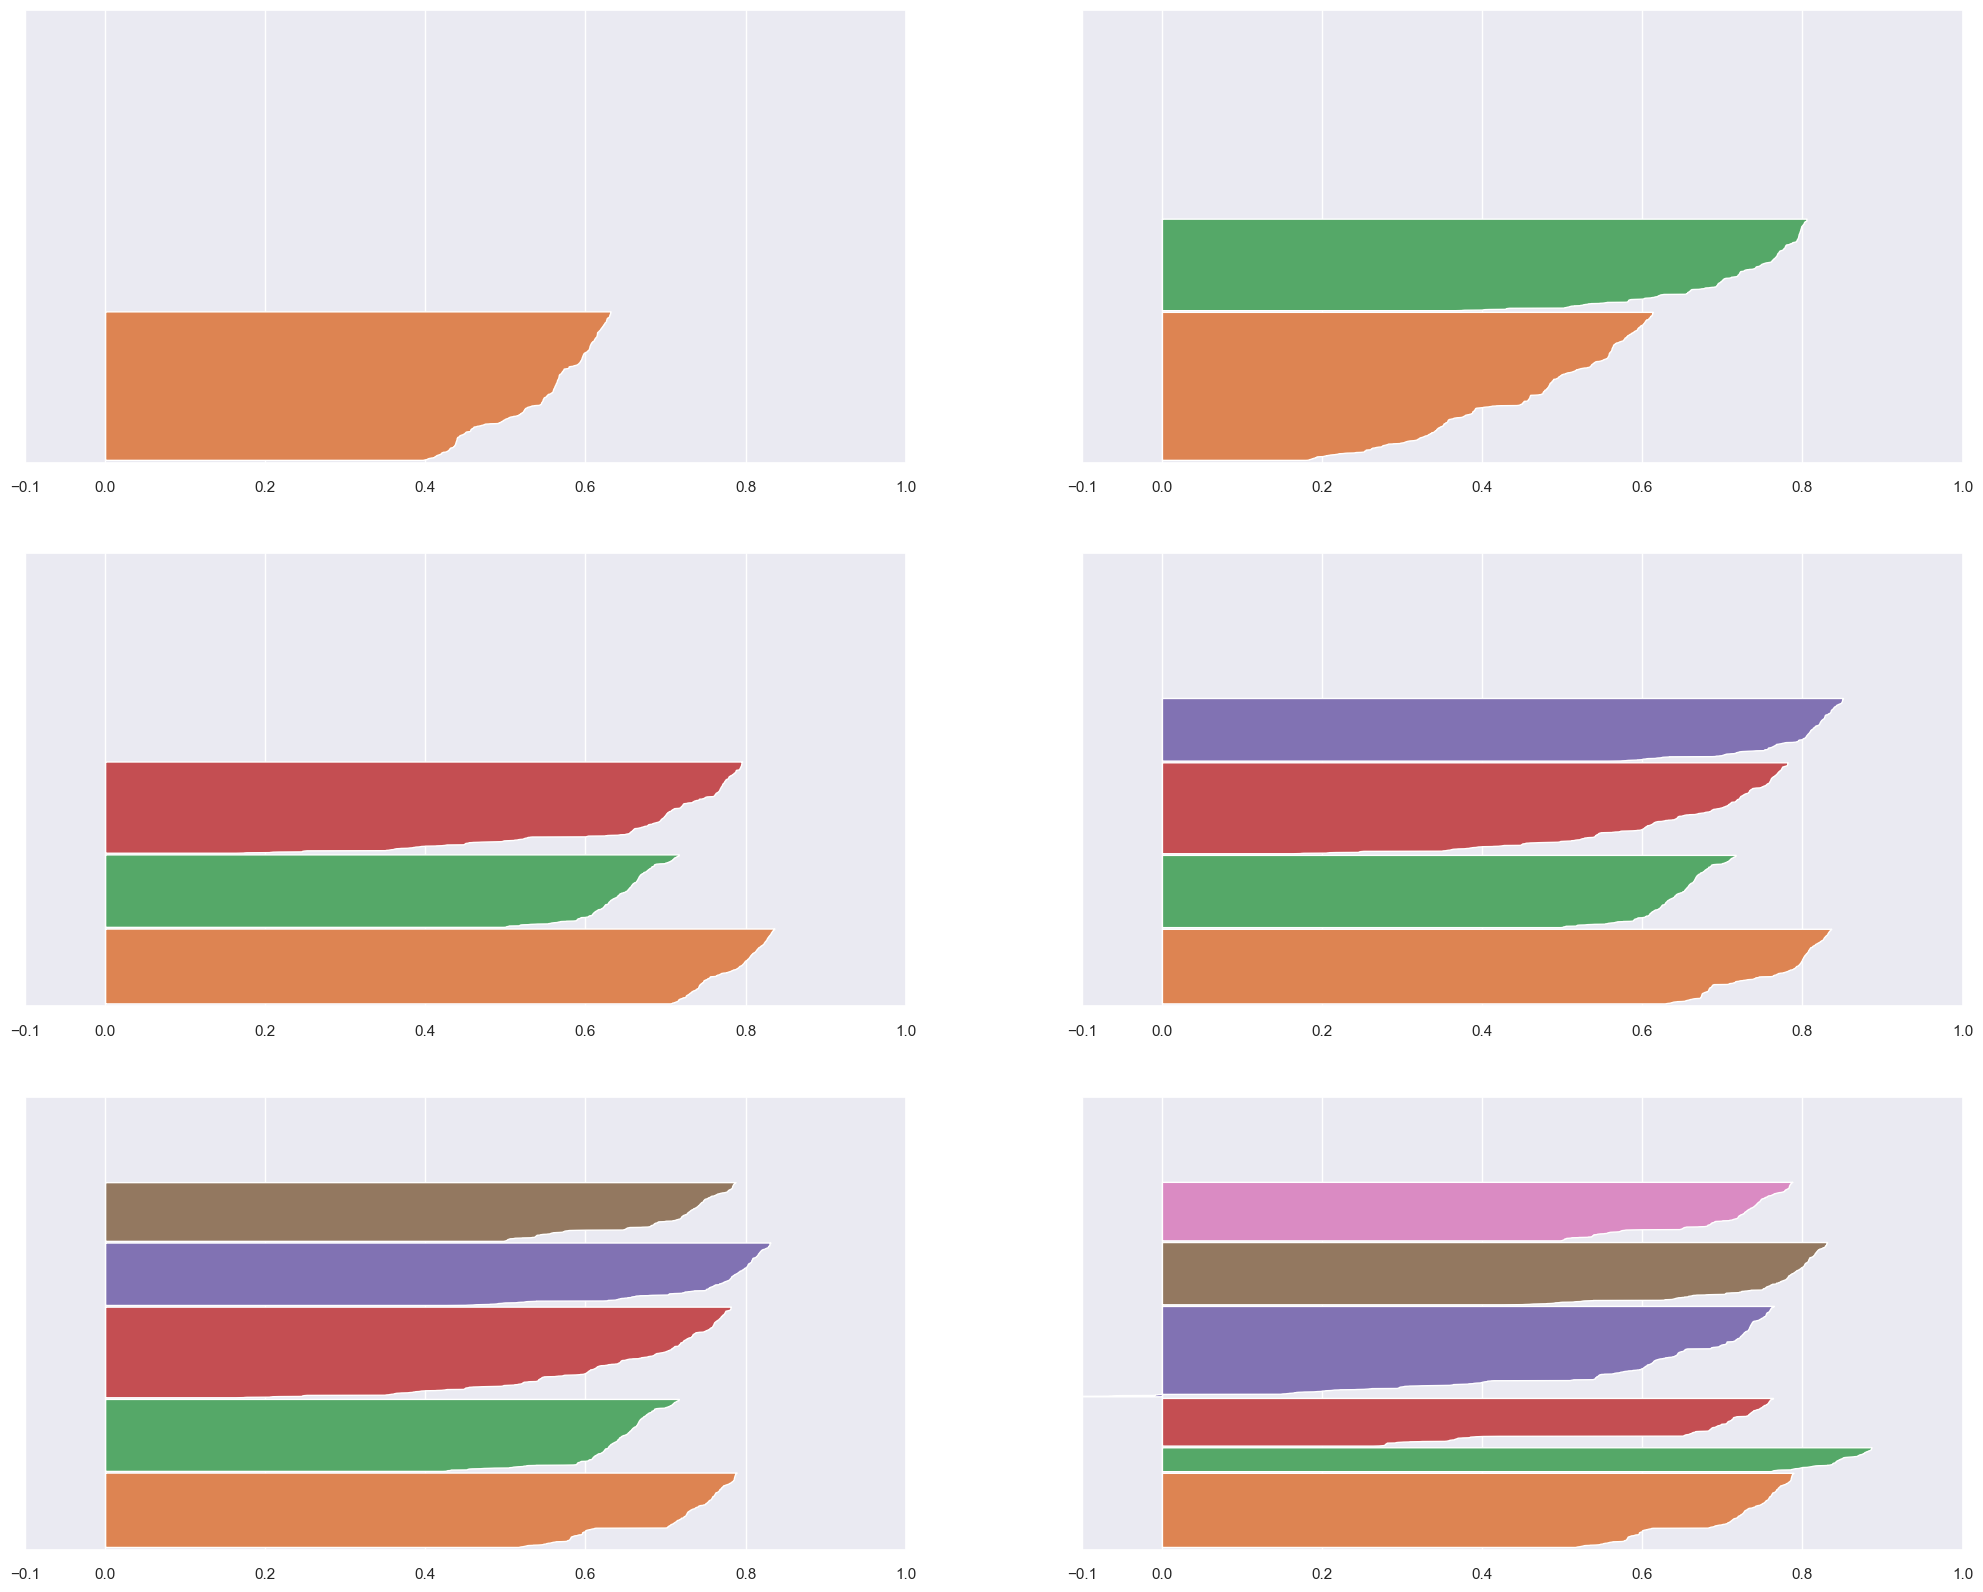

In [95]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(25,20)

for k in clusters:
    q, mod = divmod(k, 2)
    
    ax[q-1, mod].set_xlim([-0.1, 1])
    ax[q-1, mod].set_ylim([0, len(X) + (k+1)*10]) #trick for plot subplots
    
    #model definition & training
    hc_model = hc.linkage(X, 'ward')
    
    #model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    #performance
    ss = mt.silhouette_score(X, labels, metric='euclidean')
    print(f'For K = {k}, Silhouette Score: {ss}')
    
    samples_silhouette_values = mt.silhouette_samples(X, labels)
    
    y_lower=10
    
    for i in range(k):
        
        #select cluster
        ith_samples_silhouette_values = samples_silhouette_values[labels == i]
        
        #sort values
        ith_samples_silhouette_values.sort()
        
        #size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap('Spectral')
        color = cmap(i/k)
        
        ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values)
        
        y_lower = y_upper +10
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])    

In [112]:
clusters = np.arange(1,11,1)

In [113]:
clusters

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# 8.0 MODEL TRAINING

## 8.1 K-Means

In [114]:
k = 7
#definition
kmeans = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)

#training
kmeans.fit(X)

#clusters
labels_kmeans = kmeans.labels_

## 8.2 GMM

In [115]:
k = 9
#model definition
model_gmm = GaussianMixture(n_components=k) #numero de gaussianas

#model training
model_gmm.fit(X)

#model predict
labels_gmm = model_gmm.predict(X)

## 8.3 HCluster - FAVORITO

In [116]:
k=7
#model definition & training
hc_model = hc.linkage(X, 'ward')

#model predict
labels_hc = hc.fcluster(hc_model, k, criterion='maxclust')

## 8.4 DSCAN

In [117]:
eps = 3 #tamanho do raio da gaussiana
min_samples = 30 #qtd minima de pontos dentro do raio para considerar como vizinhança

#model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

#model training & predict
labels = dbscan_model.fit_predict(X)

In [118]:
#WSS
print(f'WSS Score: {kmeans.inertia_:.3f}')

print(f'SS Score: {mt.silhouette_score(X, labels):.3f}')

WSS Score: 25463.340
SS Score: 0.616


# 9.0 CLUSTER ANALYSIS

In [119]:
# df9 = df4.copy()
# df9['clusters'] = labels
df9 = X.copy()
df9['clusters'] = labels_hc

In [120]:
df9.head()

,embedding_x,embedding_y,clusters
0,12.615181,11.044086,7
1,-6.499238,-8.245778,2
2,9.478956,5.369207,6
3,7.712303,-7.336355,1
4,-3.489240,18.404636,4


## 9.1 Visualize Inspection

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

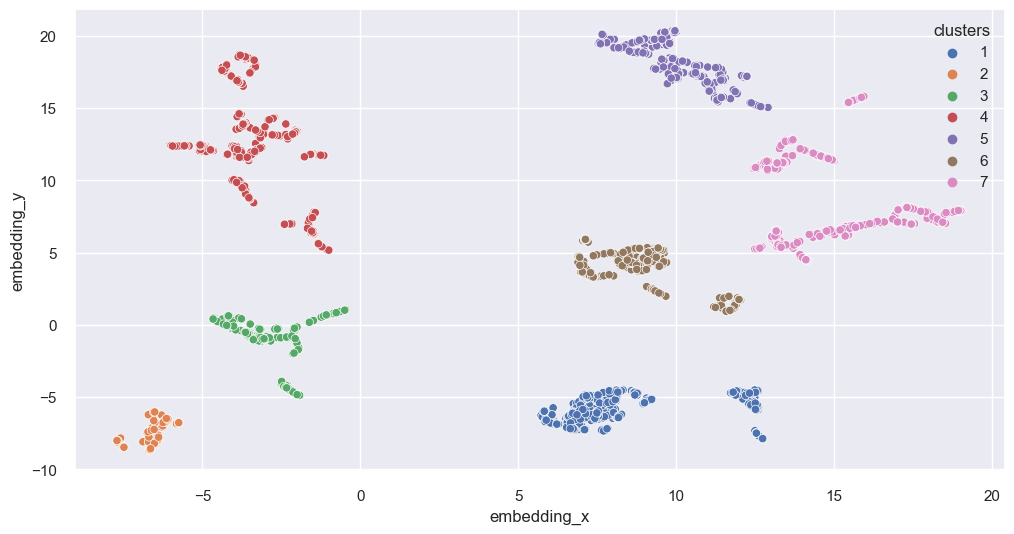

In [121]:
#para variar o modelo mudar o labels_hc acima
sns.scatterplot(data=df9, x="embedding_x", y="embedding_y", hue="clusters", palette="deep")

In [122]:
# px.scatter_3d(df9, x='monetary', y='recency', z='frequency', color=labels)

## 9.2 Silhouette Visualizer

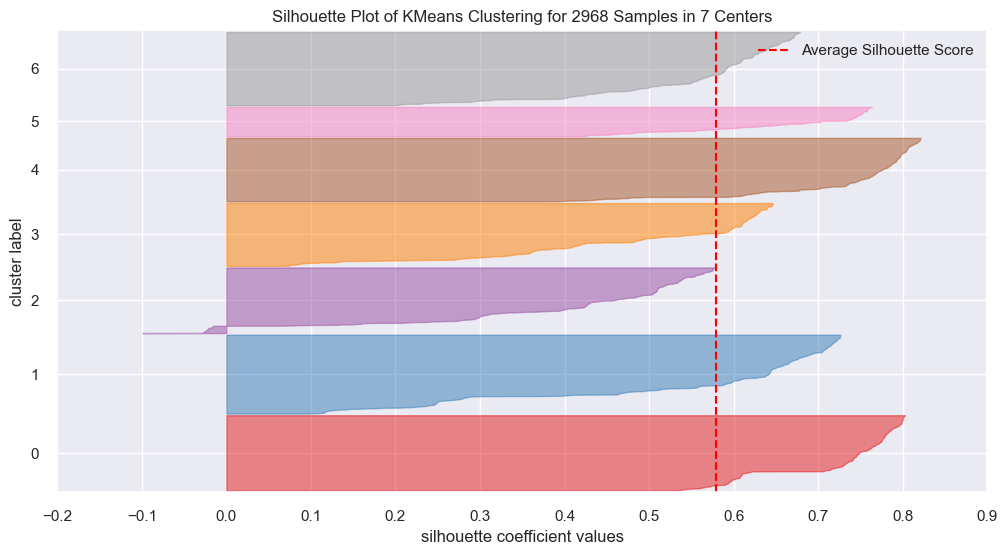

In [123]:
visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 9.3 2D Plot

In [124]:
df_viz = df9.drop('customer_id', axis=1)
#sns.pairplot(df_viz, hue='clusters')

KeyError: "['customer_id'] not found in axis"

## 9.4 UMAP - t-SNE

In [125]:
reducer = umap.UMAP(n_neighbors=70, random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='clusters',
                palette=sns.color_palette('hls', n_colors=len(df_viz['clusters'].unique())),
                data=df_viz)

NameError: name 'df_viz' is not defined

Os Clusters estarem perto um dos outros nessa figura é um bom sinal, porque significa que na alta dimensionalidade eles tem a probabilidade de estarem próximos

## 9.5 Cluster Profile

In [126]:
df95 = df4.copy()#pegar os dados nao rescalados para fazer o profile
                 #podemos deixar todas as features porque retiramos apenas para criar o embedding
df95['clusters'] = labels_hc

In [127]:
df95.head()

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket,clusters
1,12347.0,4310.00,7,2458,182,2,23.681319,60.833333,0.019126,0.0,14.714286,351.142857,7
2,12348.0,1437.24,4,2332,27,75,53.231111,94.333333,0.014085,0.0,5.250000,583.000000,2
5,12352.0,1385.74,7,526,77,36,17.996623,43.333333,0.026820,63.0,8.142857,75.142857,6
9,12356.0,2487.43,3,1573,58,22,42.886724,151.500000,0.009868,0.0,17.333333,524.333333,1
11,12358.0,928.06,2,242,17,1,54.591765,149.000000,0.013333,0.0,6.000000,121.000000,4


**Lembrete**: NÃO podemos explicar porque o customer 1 e 2 estão no mesmo clusters com esses dados, porque eles foram classificados em um espaço de embedding criado pelo algoritmo em alta dimensão. Se for especificamente você precisar explicar o porquê o os customers se parecem será necessário encontrar os clusters no espaço original ao invés do embedding.

In [128]:
#Per Monetary
df_monetary = df95.loc[:,['clusters','monetary']].groupby('clusters').mean().reset_index()

#Per Frequency
df_frequency = df95.loc[:,['clusters','frequency']].groupby('clusters').mean().reset_index()

#Per Recency
df_recency = df95.loc[:,['clusters','recency']].groupby('clusters').mean().reset_index()

#Per Pencentual
df_client_perc = df95.loc[:,['customer_id','clusters']].groupby('clusters').count().reset_index()
df_client_perc['customer_id'] = df_client_perc['customer_id'].apply(lambda x: 100*(x)/(df_client_perc['customer_id'].sum()))
df_client_perc = df_client_perc.rename(columns={'customer_id':'percent'})

#Per qtd_products
df_prods = df95.loc[:,['clusters','qtd_prods']].groupby('clusters').mean().reset_index()

#Per Returns
df_returns = df95.loc[:,['clusters','qtd_returns']].groupby('clusters').mean().reset_index()

#Per Customer
df_customer = df95.loc[:,['clusters','customer_id']].groupby('clusters').count().reset_index()

df_resume = (pd.merge(df_monetary, df_frequency, on='clusters', how='left')
             .merge(df_recency, on='clusters', how='left')
             .merge(df_client_perc, on='clusters', how='left')
             .merge(df_prods, on='clusters', how='left')
             .merge(df_returns, on='clusters', how='left')
             .merge(df_customer, on='clusters', how='left'))


In [129]:
df_resume

,clusters,monetary,frequency,recency,percent,qtd_prods,qtd_returns,customer_id
0,1,2121.153140,0.047337,57.132000,16.846361,67.232000,10.740000,500
1,2,819.306358,0.124034,85.728395,5.458221,27.944444,4.000000,162
2,3,971.025435,0.074586,75.329193,10.849057,37.462733,6.571429,322
3,4,568.228161,0.298414,116.712644,20.518868,14.123153,16.110016,609
4,5,9618.034548,0.103263,20.707143,14.150943,447.840476,166.235714,420
5,6,1685.240506,0.050577,55.002532,13.308625,88.929114,10.313924,395
6,7,2566.060375,0.044631,40.462500,18.867925,147.032143,20.912500,560


### Cluster 05 (Insiders)


- Número de customers = 420
- Recência Média = 20.70 dias
- Faturamento Médio = R$9618.03
- Média de Produtos Comprados = 447 produtos
- Frequência de Produtos Comprados = 0.1032 produtos comprados/dia

Cluster 0 - Clientes Esporádicos
    - Clientes que comprar pouco, valor baixo, e com uma média de 3 meses. Porém engloba 99% dos clientes
    
Cluster 1 - Clientes Medianos
    - Clientes que compram em média uma vez por mês mas uma quantia maior e um valor maior que os Esporádicos
    
Cluster 2 - Clientes elegíveis a Insiders
    - Gastam muito, toda semana e compram bastante produtos

# 10.0 EXPLORATORY DATA ANALYSIS(EDA) 

In [130]:
cols_selected = ['customer_id', 'monetary', 'recency', 'qtd_prods', 'frequency', 'qtd_returns', 'clusters']

In [131]:
df10 = df95[cols_selected]

In [132]:
df10.head()

,customer_id,monetary,recency,qtd_prods,frequency,qtd_returns,clusters
1,12347.0,4310.00,2,182,0.019126,0.0,7
2,12348.0,1437.24,75,27,0.014085,0.0,2
5,12352.0,1385.74,36,77,0.026820,63.0,6
9,12356.0,2487.43,22,58,0.009868,0.0,1
11,12358.0,928.06,1,17,0.013333,0.0,4


## 10.1 Hipóteses

1. O cluster insider gera em 50% da receita da minha base de dados total.
2. O cluster insider compra 5x mais frequente que o total de clientes.
3. O cluster insider demora em média metade do tempo para comprar novamento que o segundo cluster.
4. O cluster Insider tem o maior percentual de clientes entre todos os clussters.
5. O Cluster Insiders compra 4x mais produtos que o 2º cluster que compra mais.
6. O cluster Insider é o cluster que menos retorna produtos.

### H1 - O cluster insider gera 50% da receita da minha base de dados total.

In [133]:
receita_insiders = df10.loc[df10['clusters'] == 5,'monetary'].sum()
receita_total = df10['monetary'].sum()
print(f"Receita Insiders: {receita_insiders/receita_total:.2f}%")

Receita Insiders: 0.51%


VERDADEIRO

### H2 - O cluster insider compra 5x mais frequente que o total de clientes.

In [134]:
freq_insiders = df10.loc[df10['clusters'] == 5,'frequency'].mean()
freq_total = df10['frequency'].mean()
print(f"A frequência dos Insiders é em média: {freq_insiders:.2f}")
print(f"A frequência da base total é em média: {freq_total:.2f}")

A frequência dos Insiders é em média: 0.10
A frequência da base total é em média: 0.11


FALSO.  A frequência dos Insiders é em linha com a média da base total.

### H3 - O cluster insider demora em média metade do tempo para comprar novamento que o segundo cluster.

In [135]:
recency_insiders = df10.loc[df10['clusters'] == 5,'recency'].mean()
recency_total = df10['recency'].mean()
print(f"Os insiders compram em média {recency_total/recency_insiders:.2f} vezes mais rápido que a base de dados")

Os insiders compram em média 3.11 vezes mais rápido que a base de dados


FALSO. Os enquanto a base compra em média a cada 60 dias, os insiders compram em média a cada 20 dias.

### H4 - O cluster Insider tem o maior percentual de clientes entre todos os clusters.

In [136]:
df_resume.sort_values(by='percent')

,clusters,monetary,frequency,recency,percent,qtd_prods,qtd_returns,customer_id
1,2,819.306358,0.124034,85.728395,5.458221,27.944444,4.000000,162
2,3,971.025435,0.074586,75.329193,10.849057,37.462733,6.571429,322
5,6,1685.240506,0.050577,55.002532,13.308625,88.929114,10.313924,395
4,5,9618.034548,0.103263,20.707143,14.150943,447.840476,166.235714,420
0,1,2121.153140,0.047337,57.132000,16.846361,67.232000,10.740000,500
6,7,2566.060375,0.044631,40.462500,18.867925,147.032143,20.912500,560
3,4,568.228161,0.298414,116.712644,20.518868,14.123153,16.110016,609


FALSO. Os Insiders correspondem apenas à 14% da base

### H5 - O Cluster Insiders compra mais de 50% de todos os produtos em relação à base total

In [137]:
qtd_insiders = df10.loc[df10['clusters'] == 5,'qtd_prods'].sum()
qtd_total = df10['qtd_prods'].sum()
print(f"A quantidade de produtos dos insiders é {qtd_insiders/qtd_total:.2f}% da base")

A quantidade de produtos dos insiders é 0.52% da base


Verdadeiro. Os insiders correspondem à 52% da quantidade total de produtos

### H6 - O cluster Insider é o cluster que menos retorna produtos.

In [138]:
returns_insiders = df10.loc[df10['clusters'] == 5,'qtd_returns'].sum()
returns_total = df10['qtd_returns'].sum()
print(f"A quantidade de devoluções dos insiders é {returns_insiders/returns_total:.2f}% da base")

A quantidade de devoluções dos insiders é 0.67% da base


FALSO. O Insiders é o que mais devolve produtos. Talvez possa ser uma coisa boa pois quanto mais eles tem a liberdade de devolver mais eles podem comprar com segurança 

## 10.2 Perguntas de Negócio

### 1. Quem são as pessoas elegíveis para participar do programa Insiders?

In [140]:
df10.loc[df10['clusters'] == 5,['customer_id']] 

,customer_id
12,12359.0
15,12362.0
54,12415.0
65,12428.0
68,12431.0
...,...
4208,18122.0
4282,18223.0
4284,18225.0
4285,18226.0


### 2. Quantos clientes serão incluídos no grupo?

In [142]:
df10.loc[df10['clusters'] == 5,['customer_id']].shape[0] 

420

### 3. Quais são as características-chave desses clientes?

- Número de customers = 420
- Recência Média = 20.70 dias
- Faturamento Médio = R$9618.03
- Média de Produtos Comprados = 447 produtos
- Frequência de Produtos Comprados = 0.1032 produtos comprados/dia

### 4. Qual é a porcentagem de contribuição de receita dos Insiders?

### 5. Qual a expectativa de faturamento desse grupo para os próximos meses?

### 6. Quais as condições para uma pessoas ser elegível ao Insiders?

### 7. Quais as condições para uma pessoas ser removida do Insiders?

### 8. Qual a garantia que o programa de Insiders é melhor que o restante da base?

### 9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

# 11.0 DEPLOY TO PRODUCTION